### 01. Importing Libraries and Dataframe

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import os
import warnings 

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
#Importing DF

path = r'C:\Users\William Inglish\Project 6 Liquor Sales'

df_sales = pd.read_csv(os.path.join(path,'02 Data', 'Prepared', 'Sales_Wrangled.csv'), index_col = 0)

### 02. Wrangling and Subsetting Data

In [3]:
df_sales.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county_name,...,item_number,item_description,package_size,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-33179700135,2021-01-04,2576,Hy-Vee Wine and Spirits / Storm Lake,1250 N Lake St,Storm Lake,50588.0,POINT (-95.200758 42.65318400000001),11.0,BUENA VIST,...,64870,Fireball Cinnamon Whiskey,48,100,0.90,1.35,48,64.80,4.8,1.26
1,INV-33196200106,2021-01-04,2649,Hy-Vee #3 / Dubuque,400 Locust St,Dubuque,52001.0,POINT (-90.666497 42.49721900000001),31.0,DUBUQUE,...,65200,Tequila Rose Liqueur,12,750,11.50,17.25,4,69.00,3.0,0.79
2,INV-33184300011,2021-01-04,2539,Hy-Vee Food Store / Iowa Falls,640 S. Oak,Iowa Falls,50126.0,POINT (-93.262364 42.508752),42.0,HARDIN,...,38008,Smirnoff 80prf PET,6,1750,14.75,22.13,6,132.78,10.5,2.77
3,INV-33184100015,2021-01-04,4024,Wal-Mart 1546 / Iowa Falls,840 S Oak,Iowa Falls,50126.0,POINT (-93.262446 42.503407),42.0,HARDIN,...,36648,Caliber Vodka,12,750,3.31,4.97,12,59.64,9.0,2.37
4,INV-33174200025,2021-01-04,5385,Vine Food & Liquor,2704 Vine St.,West Des Moines,50265.0,POINT (-93.741511 41.580206),77.0,POLK,...,4626,Buchanan Deluxe 12YR,12,750,20.99,31.49,2,62.98,1.5,0.39


In [4]:
df_time = df_sales[['date', 'sale_dollars']]

In [5]:
df_time.head()

,date,sale_dollars
0,2021-01-04,64.80
1,2021-01-04,69.00
2,2021-01-04,132.78
3,2021-01-04,59.64
4,2021-01-04,62.98


In [6]:
df_time.shape

(2805307, 2)

In [7]:
# Removing all outliers from sale_dollars column

df_time_wrangled = df_time[df_time['sale_dollars'] <= 302.63]

In [8]:
df_time_wrangled.shape

(2585326, 2)

In [9]:
# Set the "Date" column as the index

from datetime import datetime

df_time_wrangled['datetime'] = pd.to_datetime(df_time_wrangled['date']) # Create a datetime column from "Date.""
df_time_wrangled = df_time_wrangled.set_index('datetime') # Set the datetime as the index of the dataframe.
df_time_wrangled.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
df_time_wrangled.head()

,sale_dollars
datetime,
2021-01-04,64.80
2021-01-04,69.00
2021-01-04,132.78
2021-01-04,59.64
2021-01-04,62.98


In [10]:
df_time_wrangled.sort_index(inplace=True)

In [11]:
df_time_wrangled.shape

(2585326, 1)

In [12]:
# Subsetting an average aggregation of sales dollars

df_avg = df_time_wrangled.groupby('datetime').agg('mean')
df_avg

,sale_dollars
datetime,
2021-01-04,95.065897
2021-01-05,88.700252
2021-01-06,97.910449
2021-01-07,104.507983
2021-01-08,92.199658
...,...
2022-01-26,113.188702
2022-01-27,100.386433
2022-01-28,99.782075


In [13]:
# Subsetting a median aggregation of sales dollars

df_median = df_time_wrangled.groupby('datetime').agg('median')
df_median

,sale_dollars
datetime,
2021-01-04,76.44
2021-01-05,67.50
2021-01-06,78.66
2021-01-07,87.75
2021-01-08,72.00
...,...
2022-01-26,94.20
2022-01-27,77.40
2022-01-28,75.36


**I selected the sale_dollars column due to it having less variance than the other fields in the whole dataframe.**

### 03. Line Chart

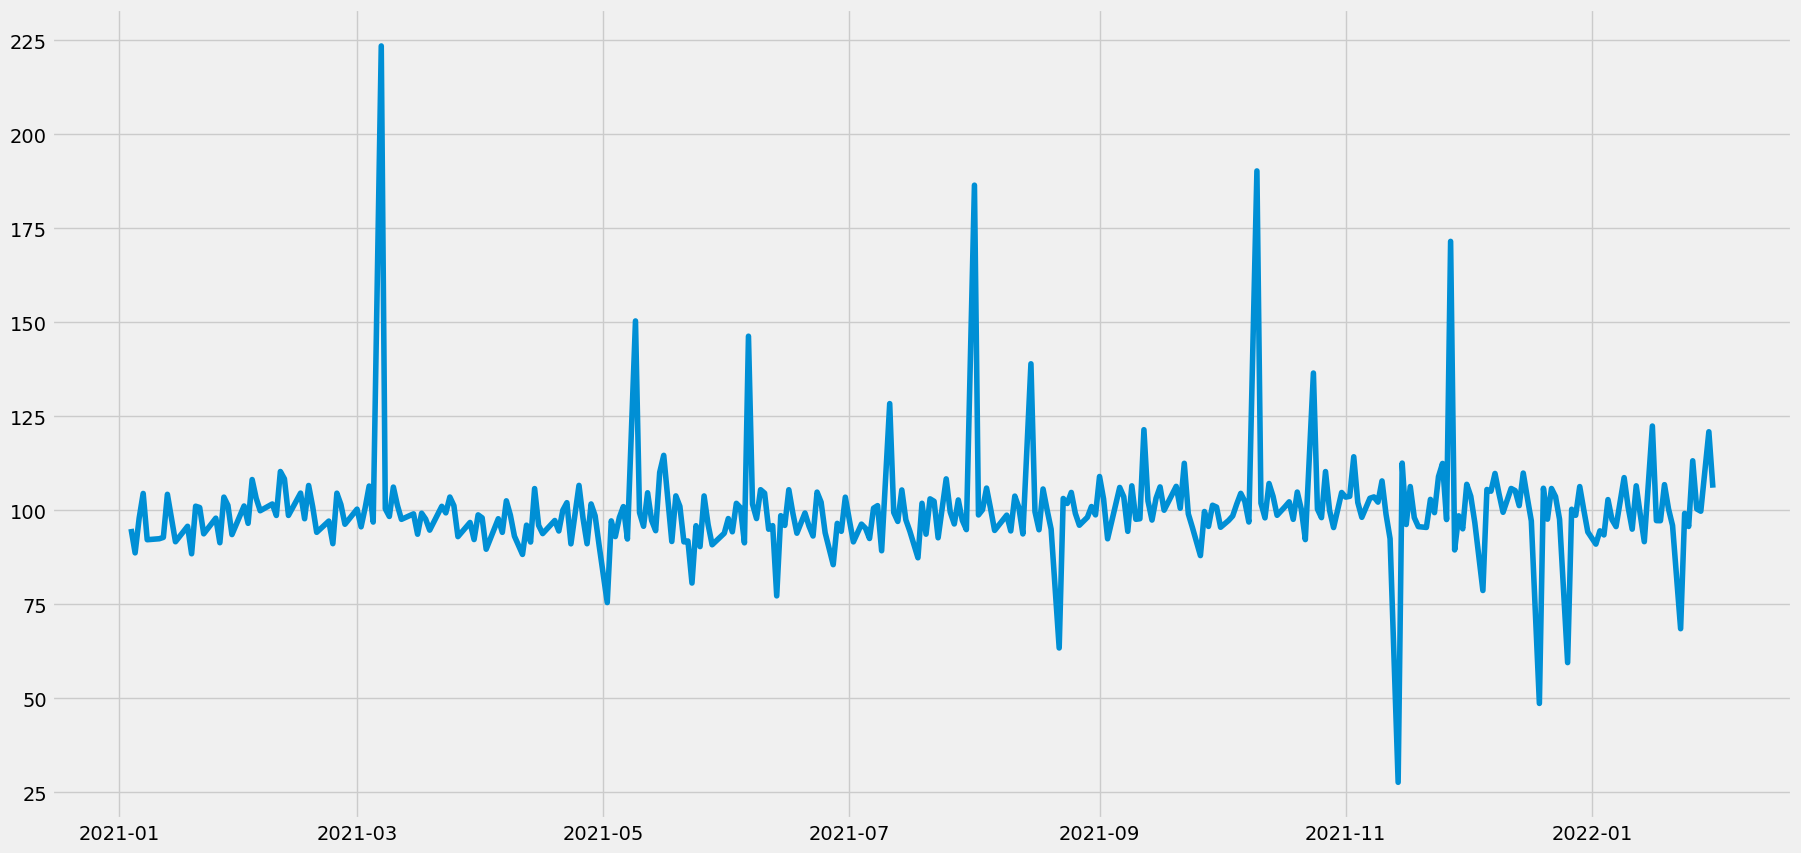

In [14]:
# Plotting line chart for the average sales dollars over the year

plt.figure(figsize=(20,10), dpi=100)
plt.plot(df_avg)

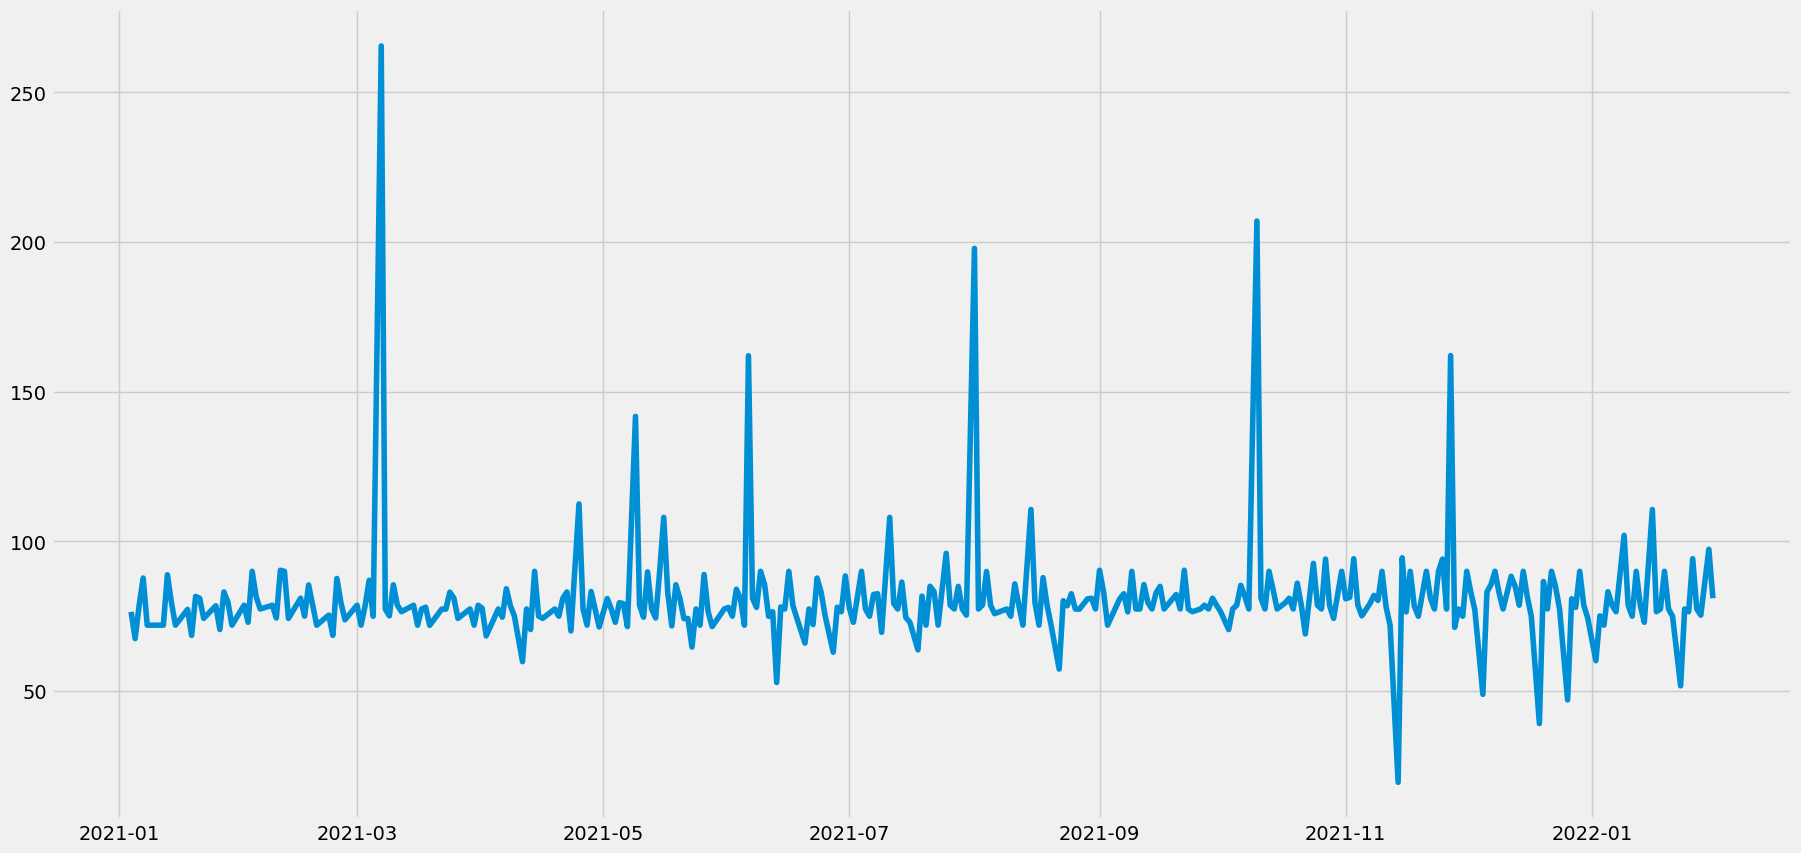

In [15]:
# Plotting line chart for the median sales dollars over the year

plt.figure(figsize=(20,10), dpi=100)
plt.plot(df_median)

### 04. Decomposition of Average Sale Dollars

In [16]:
# Decomposing the time series using an additive model

decomposition = seasonal_decompose(df_avg, model = 'multiplicative', period = 30)
decomposition2 = seasonal_decompose(df_avg, period = 30) #Checking if there is a difference in parameters

In [17]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

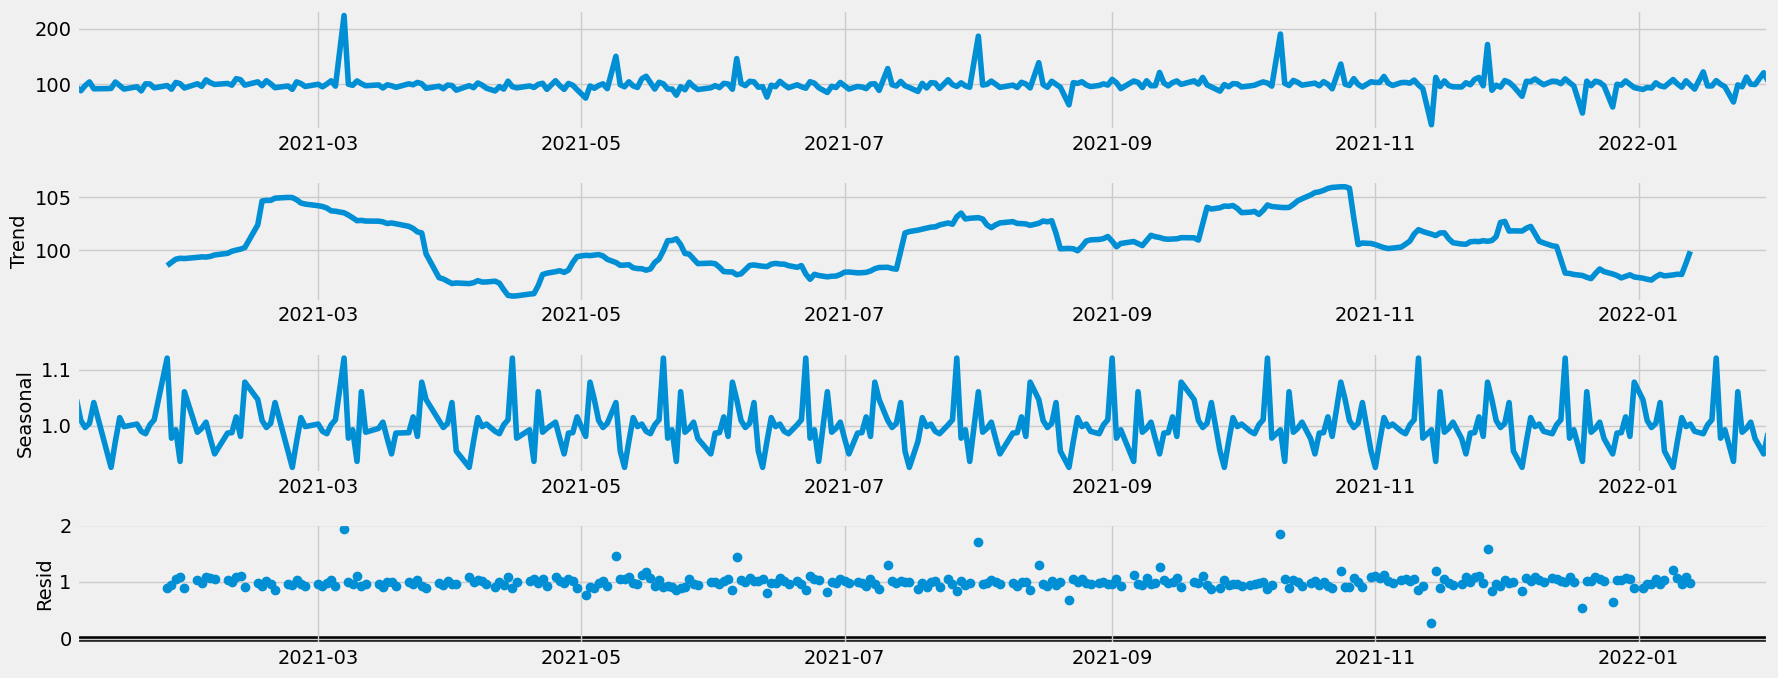

In [18]:
# Plotting the separate components

decomposition.plot()
plt.show()

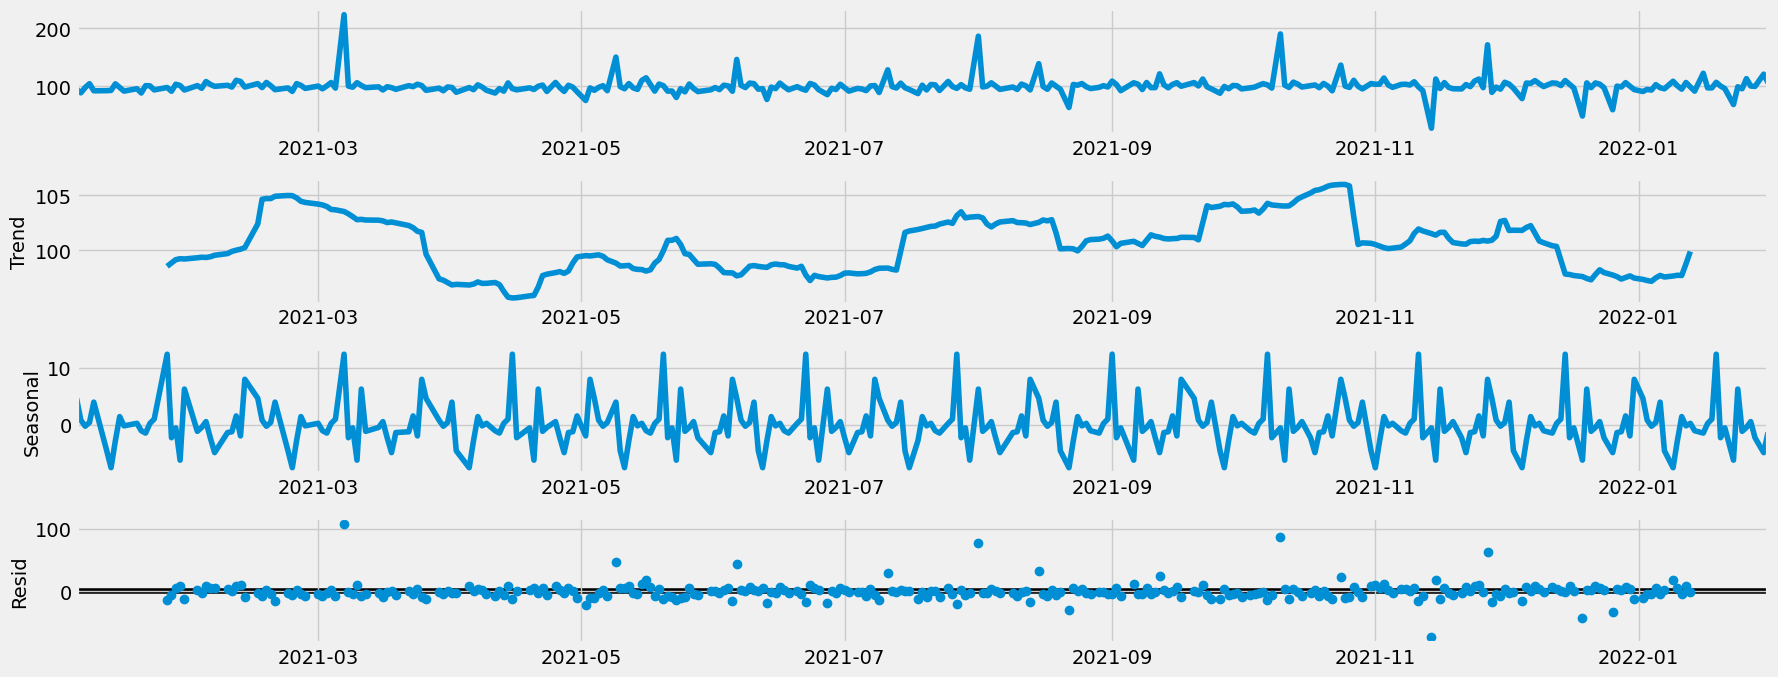

In [19]:
# Plotting the separate components

decomposition2.plot()
plt.show()

### 05. Testing for Stationary

In [20]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries): # Define the function to perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Applying the test using the function on the time series data
dickey_fuller(df_avg['sale_dollars'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.859056e+01
p-value                        2.073678e-30
Number of Lags Used            0.000000e+00
Number of Observations Used    3.250000e+02
Critical Value (1%)           -3.450632e+00
Critical Value (5%)           -2.870474e+00
Critical Value (10%)          -2.571530e+00
dtype: float64


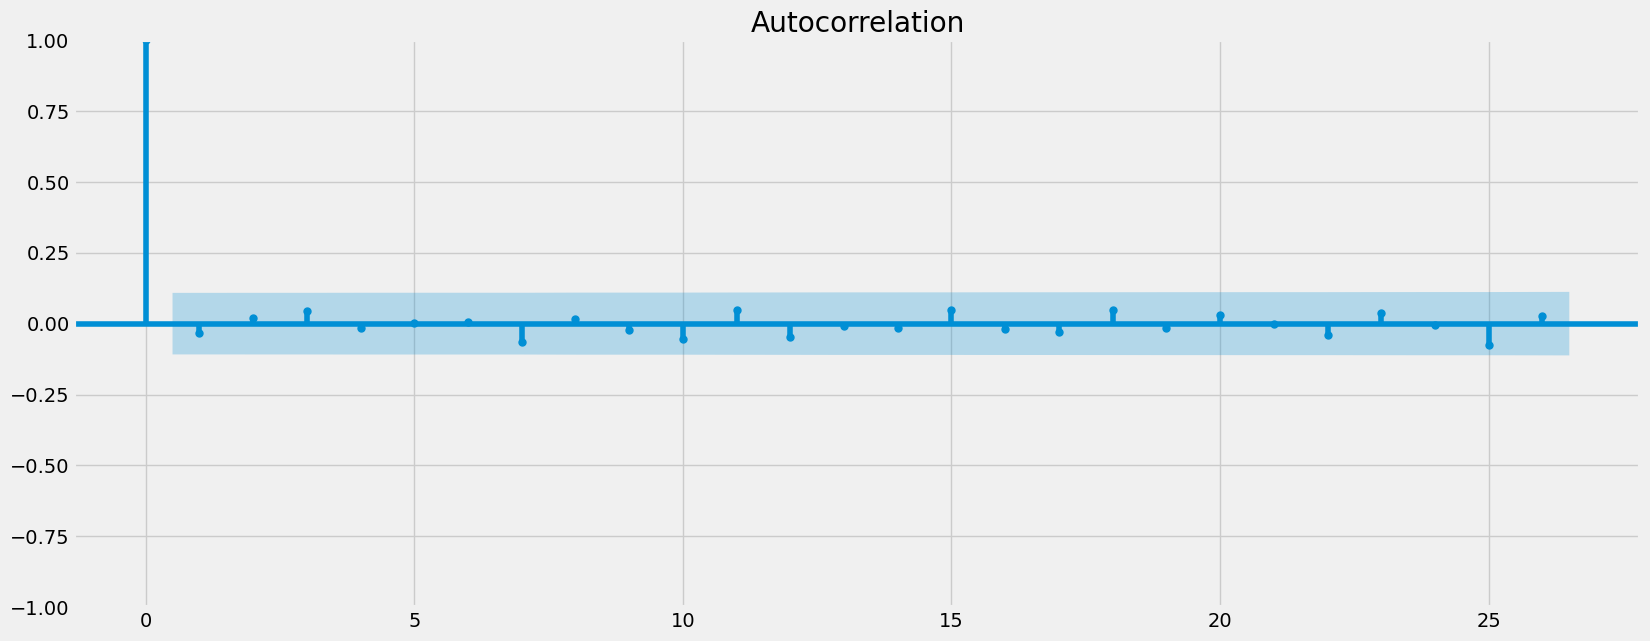

In [21]:
# Checking out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Importing the autocorrelation and partial correlation plots

plot_acf(df_avg)
plt.show()

### 05. Stationarizing the Iowa Liquor Sales Data

In [22]:
data_diff = df_avg - df_avg.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [23]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [24]:
data_diff.head()

,sale_dollars
datetime,
2021-01-05,-6.365645
2021-01-06,9.210197
2021-01-07,6.597534
2021-01-08,-12.308325
2021-01-11,0.263617


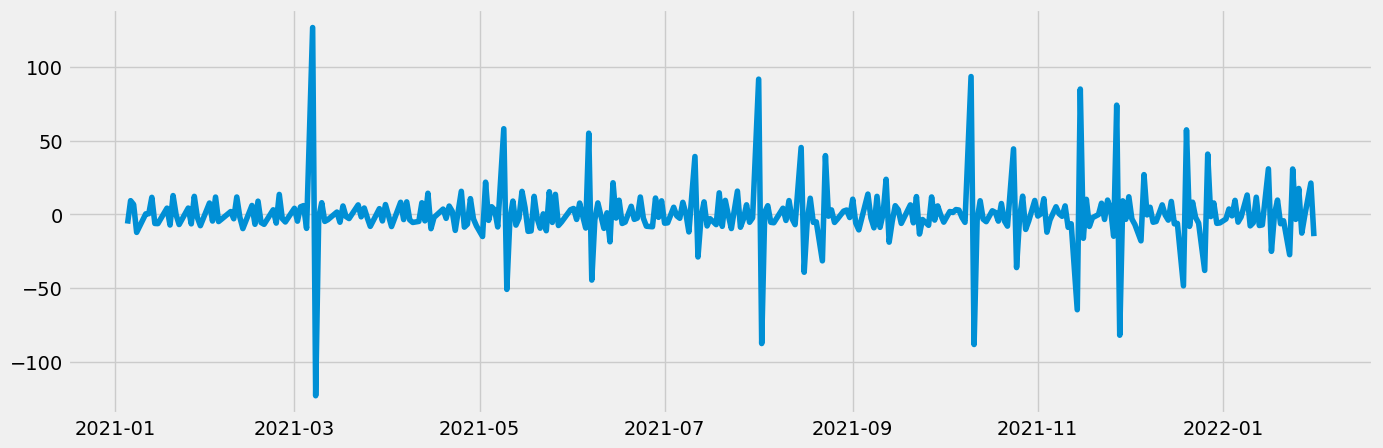

In [25]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [26]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -8.316521e+00
p-value                        3.668252e-13
Number of Lags Used            1.300000e+01
Number of Observations Used    3.110000e+02
Critical Value (1%)           -3.451553e+00
Critical Value (5%)           -2.870879e+00
Critical Value (10%)          -2.571746e+00
dtype: float64


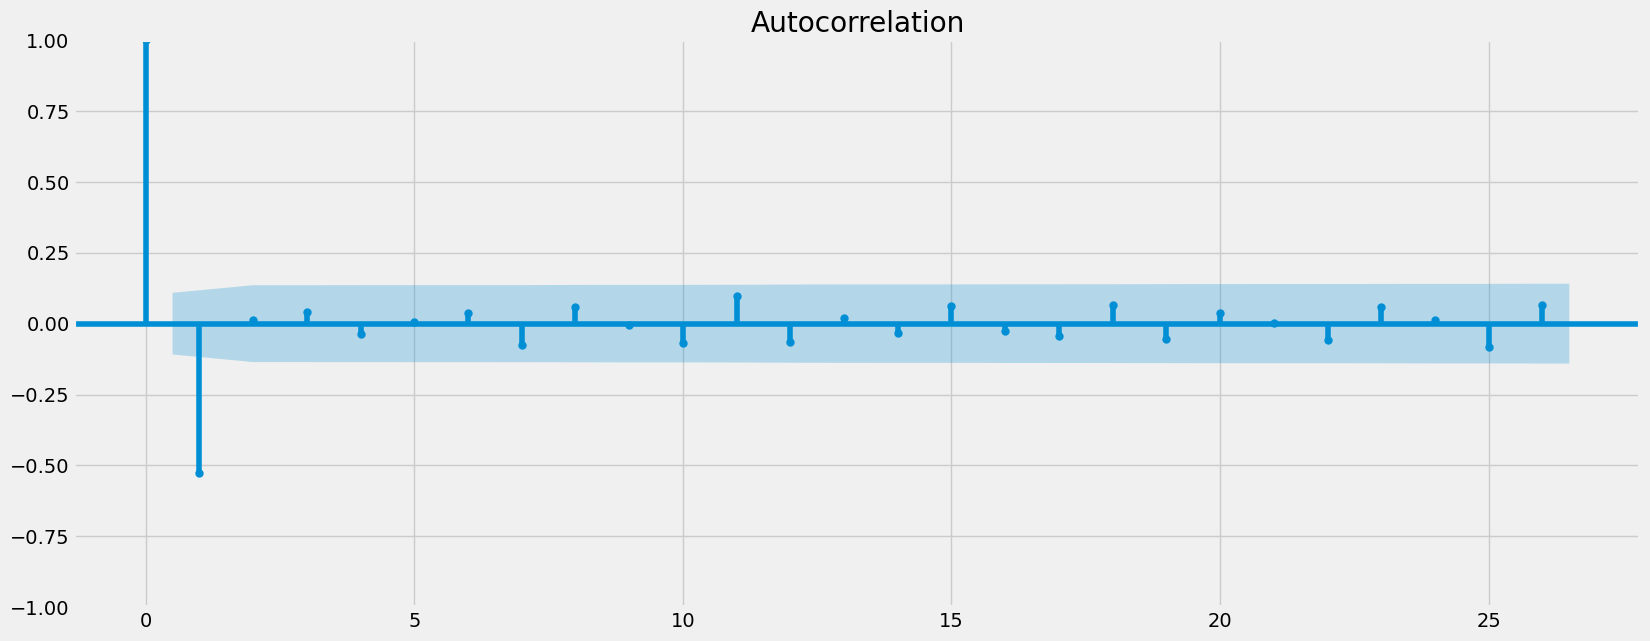

In [27]:
plot_acf(data_diff)
plt.show()

**Looking at the Dickey-Fuller test and the plot above, we can see that p is significantly less than 0.5 . We can confidently say the we reject the null hypothesis and consider my time series stationary**